In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.distributions.empirical_distribution import ECDF # Empirical CDF

# Cricket

In [4]:
sehwag = pd.read_csv("sehwag.csv")
dravid = pd.read_csv("dravid.csv")

In [5]:
sehwag.head(20)

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,1 Apr 1999,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14 Dec 2000,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25 Mar 2001,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27 Jun 2001,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30 Jun 2001,ODI # 1731
5,4,9,9,1,0,44.44,3,stumped,2,NaN,v West Indies,Harare,4 Jul 2001,ODI # 1733
6,2,12,7,0,0,28.57,5,caught,2,NaN,v West Indies,Harare,7 Jul 2001,ODI # 1734
7,0,2,3,0,0,0.00,6,caught,2,NaN,v New Zealand,Colombo (RPS),20 Jul 2001,ODI # 1736
8,12,17,14,0,0,85.71,8,caught,2,NaN,v Sri Lanka,Colombo (RPS),22 Jul 2001,ODI # 1737
9,33,59,54,3,0,61.11,2,run out,2,NaN,v New Zealand,Colombo (RPS),26 Jul 2001,ODI # 1739


In [6]:
sehwag.shape

(245, 14)

In [7]:
sehwag["Runs"].describe()

count    245.000000
mean      33.767347
std       34.809419
min        0.000000
25%        8.000000
50%       23.000000
75%       46.000000
max      219.000000
Name: Runs, dtype: float64

In [8]:
dravid["Runs"].describe()

count    318.000000
mean      34.242138
std       29.681822
min        0.000000
25%       10.000000
50%       26.000000
75%       54.000000
max      153.000000
Name: Runs, dtype: float64

In [9]:
p_25 = np.percentile(sehwag["Runs"], 25) # 25th percentile or Q1
p_25

np.float64(8.0)

In [10]:
p_50 = np.percentile(sehwag["Runs"], 50) # 50th percentile or Q2, "median"
p_50

np.float64(23.0)

In [11]:
p_75 = np.percentile(sehwag["Runs"], 75) # 75th percentile or Q3
p_75

np.float64(46.0)

In [12]:
iqr = p_75 - p_25
iqr

np.float64(38.0)

In [13]:
lower = max(p_25 - 1.5 * iqr, 0) #ignoring negative number bcoz score cannot be in negative
lower

0

In [14]:
upper = p_75 + 1.5 * iqr
upper

np.float64(103.0)

<Axes: xlabel='Runs'>

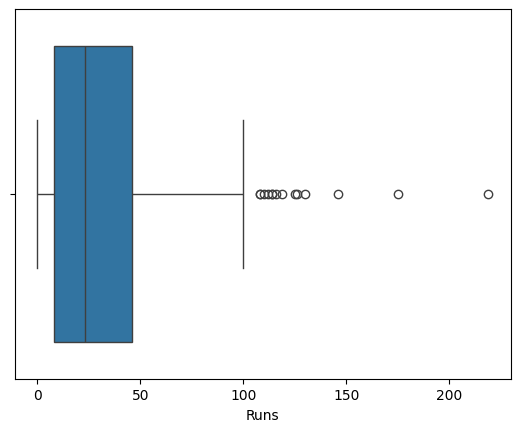

In [15]:
sns.boxplot(data=sehwag["Runs"], orient="h")

In [16]:
sehwag_outlier = sehwag[sehwag["Runs"] > upper]

In [17]:
len(sehwag_outlier)

14

In [18]:
len(sehwag_outlier) / len(sehwag)

0.05714285714285714

In [19]:
p_25 = dravid["Runs"].quantile(0.25) # Q1 or p_25
p_50 = dravid["Runs"].quantile(0.5)  # Q2 or p_50 or median
p_75 = dravid["Runs"].quantile(0.75) # Q3 or p_75
print(p_25, p_50, p_75)

10.0 26.0 54.0


In [20]:
iqr = p_75 - p_25 
lower = max(p_25 - 1.5*iqr, 0)
upper = p_75 + 1.5*iqr
print(lower, upper)
print(iqr)

0 120.0
44.0


<Axes: xlabel='Runs'>

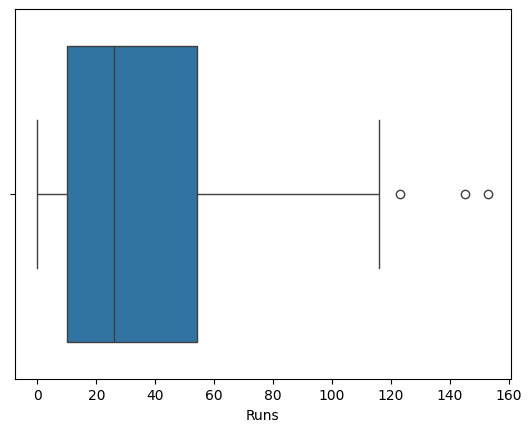

In [21]:
sns.boxplot(data=dravid["Runs"], orient="h")

In [22]:
dravid_outlier = dravid[dravid["Runs"] > upper]
len(dravid_outlier)

3

In [23]:
len(dravid_outlier) / len(dravid)

0.009433962264150943

# Height example

In [24]:
df_hw = pd.read_csv("weight-height.csv")
df_hw

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [25]:
df_height = df_hw["Height"]
df_height.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [26]:
df_height.median()

np.float64(66.31807008178464)

In [27]:
min_height = df_height.min()
min_height

np.float64(54.2631333250971)

In [28]:
max_height = df_height.max()
max_height

np.float64(78.9987423463896)

In [29]:
total = len(df_height)

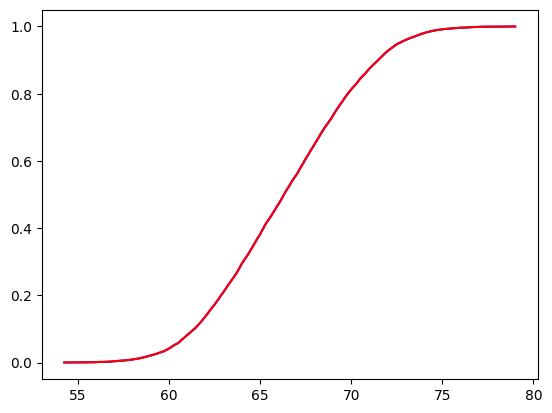

In [30]:
# Empirical Cumulative Distribution Function
x_values = np.linspace(min_height, max_height, 100)
y_values = []

for x in x_values:
    people_shorter_than_x = df_height[df_height<=x]
    num_people_shorter_than_x = len(people_shorter_than_x)
    frac_people_shorter_than_x = num_people_shorter_than_x/total
    y_values.append(frac_people_shorter_than_x)
plt.plot(x_values, y_values, c="b")

## Cumulative Distribution Function:

# From data, so "Empirical"
e = ECDF(df_height)
plt.plot(e.x, e.y, c="r")

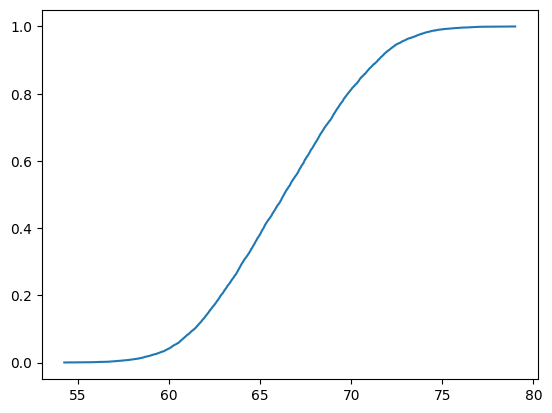

In [31]:
data = df_height
xaxis=np.sort(data)
yaxis=np.arange(1,len(data)+1)/len(data)
plt.plot(xaxis, yaxis)